<a href="https://colab.research.google.com/github/thiagoCorreaOriginal/Data-Science_Pipeline/blob/main/CargaDeDados_2GS_Pantheon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Criação de tabela e carga de dados em uma dimensão nuvem

# **Carga de dados da dimensão tempo para um banco na nuvem** 


---



> **Integrantes do Projeto:**
- Thiago Corrêa                   

# Importação dos dados

In [ ]:
# importar bibliotecas que lidam com os dados
import numpy as np
import pandas as pd

In [ ]:
dados = pd.read_excel("tempo.xlsx")

> **A dimensão tempo é uma tabela na qual suas colunas representam:**
1. `sk_data`: surrogate key gerada pelo sistema (não deve ser preenchida)
1. `nm_mes`: nome do mês 
1. `nr_dia_mes`: número do dia do mês
1. `nm_dia_semana`: nome do dia da semana
1. `nr_semana`: número da semana no ano
1. `ds_trimestre`: nome do trimestre no ano
1. `nr_ano`: número que representa o ano da data


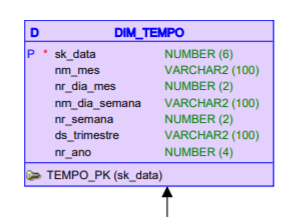

In [ ]:
dados.head(1)

,nm_mes,nr_dia_mes,nm_dia_semana,nr_semana,ds_trimestre,nr_ano
0,Março,13,Segunda-Feira,10,Primeiro,2020


In [ ]:
#verificar se existem dados nulos
print(pd.isnull(dados).sum())

nm_mes           0
nr_dia_mes       0
nm_dia_semana    0
nr_semana        0
ds_trimestre     0
nr_ano           0
dtype: int64


não existem dados nulos

# Criar tabela para a carga de dados na nuvem

In [ ]:
#instalar a lib de conexão com o mysql
!pip install mysql-connector

> O Processo foi realizado no [Portal de acesso ao Azure](https://portal.azure.com/#home) utilizando um grupo de recursos próprio e criando um servidor de banco de dados (MySQL)
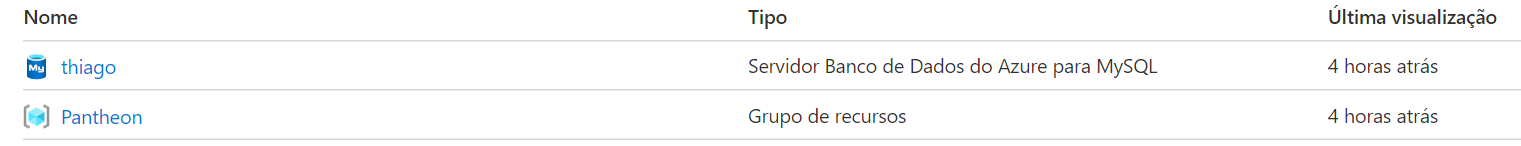


> O servidor de banco de dados foi criado com as seguintes especificações:
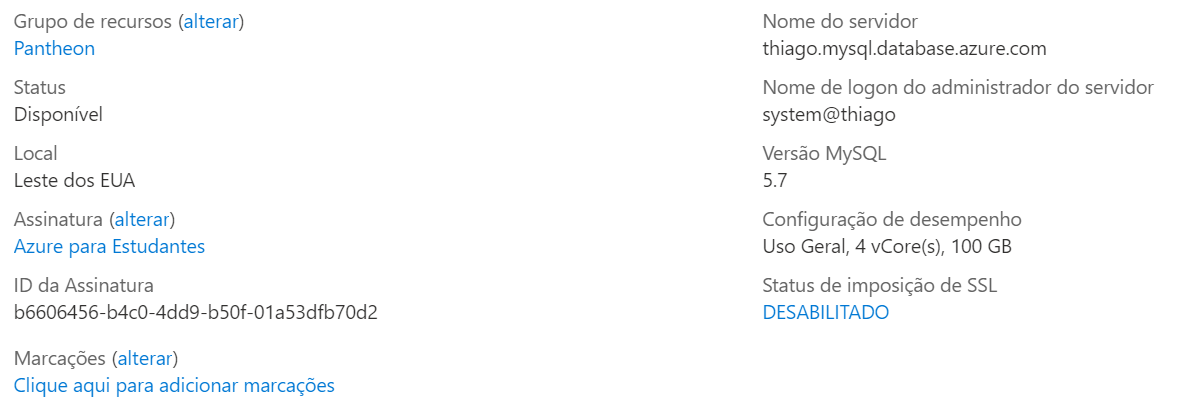


> Vale lembrar que o ip de conexão foi modificado para:
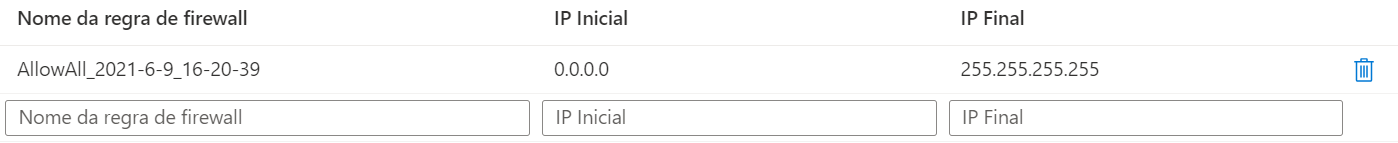

>Para entrar no banco, use uma ferramenta de conexão sql e insira o comando:
>> mysql -h thiago.mysql.database.azure.com -u system@thiago -p
>
> E use a senha:
>> Pantheon.123

In [ ]:
# importar biblioteca que realiza a conexão com o mysql
import mysql.connector

# conexão mysql
mydb = mysql.connector.connect(
  host="thiago.mysql.database.azure.com",
  user="system@thiago",
  password="Pantheon.123",
  database="PANTHEON"
)

# cursor para transitar entre a conexão
mycursor = mydb.cursor()

In [ ]:
# Query de Data Definition Language que cria a tabela de dimensão tempo
ddl =  """CREATE TABLE IF NOT EXISTS DIM_TEMPO( 
   sk_data INT NOT NULL AUTO_INCREMENT PRIMARY KEY,
   nm_mes VARCHAR(100) NOT NULL,
   nr_dia_mes INT NOT NULL,
   nm_dia_semana VARCHAR(100) NOT NULL,
   nr_semana INT NOT NULL,
   ds_trimestre VARCHAR(100) NOT NULL,
   nr_ano INT NOT NULL
    )"""

In [ ]:
# Executar a query de DDL
mycursor.execute(ddl)

# Inserir dados do excel na tabela criada


In [ ]:
# tentativa de inserção
try:

  # Instanciar conexão com o MySQL em um cursor que navegue pelo banco
  mycursor = mydb.cursor()
  # for que passa pelas linhas do dataset
  for i,row in dados.iterrows():
    # %s recebem o tamanho da string, inserindo um varchar com o mesmo tamanho
    sql = 'INSERT INTO DIM_TEMPO (nm_mes,nr_dia_mes,nm_dia_semana,nr_semana,ds_trimestre,nr_ano) VALUES (%s,%s,%s,%s,%s,%s)'  
    # inserir a query com a respectiva linha
    mycursor.execute(sql, tuple(row))

  print('registro inserido')
  # realizar commit (confirmar transação) e fechar conexão
  mydb.commit()
  mycursor.close()
  mydb.close()

#except para análise de possível erro
except Exception as e:
  print("Erro na conexão com MySQL", e)

registro inserido


#Consulta dos dados inseridos na tabela

In [ ]:
try:
    # query de consulta de dados
    select = "select sk_data,nm_mes,nr_dia_mes,nm_dia_semana,nr_semana,ds_trimestre,nr_ano from DIM_TEMPO LIMIT 5"
    # Instanciar conexão com o MySQL em um cursor que navegue pelo banco
    mycursor = mydb.cursor(buffered=True)
    # Executar a query
    mycursor.execute(select)
    # pegar todos os registros
    registros = mycursor.fetchall()
    print("Número de linhas selecionadas: ", mycursor.rowcount)

    print("\nPrinting each row")
    for linha in registros:
        print("Surrogate Key da data = ", linha[0], )
        print("Nome do mês = ", linha[1])
        print("Número do dia no mês  = ", linha[2])
        print("Nome do dia na semana  = ", linha[3])
        print("Número da semana no ano  = ", linha[4])
        print("Trimestre  = ", linha[5])
        print("Ano  = ", linha[6], "\n")

except mysql.connector.Error as e:
    print("Error reading data from MySQL table", e)
finally:
    if mydb.is_connected():
        mydb.close()
        mycursor.close()
        print("MySQL connection is closed")

Número de linhas selecionadas:  5

Printing each row
Surrogate Key da data =  1
Nome do mês =  Março
Número do dia no mês  =  13
Nome do dia na semana  =  Segunda-Feira
Número da semana no ano  =  10
Trimestre  =  Primeiro
Ano  =  2020 

Surrogate Key da data =  2
Nome do mês =  Março
Número do dia no mês  =  20
Nome do dia na semana  =  Domingo
Número da semana no ano  =  24
Trimestre  =  Primeiro
Ano  =  2020 

Surrogate Key da data =  3
Nome do mês =  Março
Número do dia no mês  =  28
Nome do dia na semana  =  Terça-Feira
Número da semana no ano  =  25
Trimestre  =  Primeiro
Ano  =  2020 

Surrogate Key da data =  4
Nome do mês =  Março
Número do dia no mês  =  27
Nome do dia na semana  =  Quinta-Feira
Número da semana no ano  =  25
Trimestre  =  Primeiro
Ano  =  2020 

Surrogate Key da data =  5
Nome do mês =  Março
Número do dia no mês  =  12
Nome do dia na semana  =  Terça-Feira
Número da semana no ano  =  10
Trimestre  =  Primeiro
Ano  =  2020 

MySQL connection is closed


> Dessa forma é possível utilizar os dados da dimensão tempo de forma online, já que foi realizada uma carga de dados em nuvem